# Adversarial Examples

## Preparations
First of all let's load and prepare the dataset. For this notebook we will use the Fashion MNIST dataset. For more info see: https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [0]:
import numpy as np

print('Training set size:', x_train.shape)
print('Training labels size:', y_train.shape)
print('Test set size:', x_test.shape)
print('Test labels size:', y_test.shape)
print('Scale of the samples:', (np.min(x_train), np.max(x_train)))
print('Number of unique labels:', len(np.unique(y_train)))

Training set size: (60000, 28, 28)
Training labels size: (60000,)
Test set size: (10000, 28, 28)
Test labels size: (10000,)
Scale of the samples: (0, 255)
Number of unique labels: 10


To use Conv2D layers we have to reshape the data.

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Create a validation set.

In [0]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, shuffle=True)

In [0]:
print('Shape of the training set', x_train.shape)
print('Shape of the validation set', x_valid.shape)

Shape of the training set (48000, 28, 28, 1)
Shape of the validation set (12000, 28, 28, 1)


Normalize the data.

In [0]:
x_train = (x_train / 127.5) - 1
x_valid = (x_valid / 127.5) - 1 
x_test = (x_test / 127.5) - 1
print('Scale of the samples:', (np.min(x_train), np.max(x_train)))

Scale of the samples: (-1.0, 1.0)


## Build a simple CNN
After we finished with the data pre-processing we can build and train our model.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
batch_size = 64
epochs = 10
num_classes = 10

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', 
                 padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dens

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
              metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    verbose=1, validation_data=(x_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 117us/step - loss: 0.4155 - acc: 0.8525 - val_loss: 0.3408 - val_acc: 0.8799
Epoch 2/10
48000/48000 [==============================] - 3s 66us/step - loss: 0.2902 - acc: 0.8975 - val_loss: 0.3001 - val_acc: 0.8952
Epoch 3/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.2498 - acc: 0.9112 - val_loss: 0.2870 - val_acc: 0.8972
Epoch 4/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.2245 - acc: 0.9196 - val_loss: 0.2852 - val_acc: 0.9038
Epoch 5/10
48000/48000 [==============================] - 3s 69us/step - loss: 0.2032 - acc: 0.9271 - val_loss: 0.2868 - val_acc: 0.9037
Epoch 6/10
48000/48000 [==============================] - 4s 74us/step - loss: 0.1848 - acc: 0.9314 - val_loss: 0.3057 - val_acc: 0.8941
Epoch 7/10
48000/48000 [==============================] - 4s 74us/step - loss: 

Plot the learning curves.

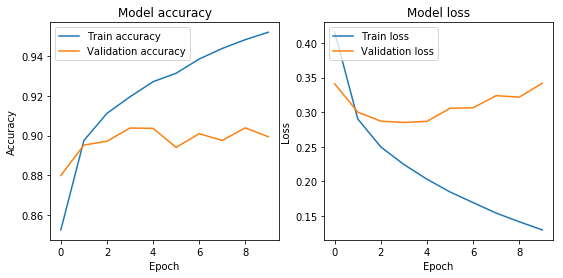

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

Evalute our model on the test set.

In [0]:
loss, acc = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', acc)

10000/10000 [==============================] - 0s 45us/step
Test loss: 0.35205124217271805
Test accuracy: 0.8973


Let's examine the samples that were incorrectly classified.

In [0]:
predictions = model.predict(x_test)
print(predictions[0])
# First we have to convert the results to actual numbers
probabilities = np.max(predictions, axis=1)
predictions = np.argmax(predictions, axis=1)
print(predictions[0])

[5.0161635e-09 2.9549538e-09 2.4956759e-07 3.7101762e-09 5.2775095e-09
 3.4167120e-04 1.9582977e-07 7.3391753e-03 1.0813212e-05 9.9230790e-01]
9


In [0]:
# Then we can select the incorrect predictions
correct =  np.where(predictions == y_test)[0]
incorrect = np.where(predictions != y_test)[0]
print('Number of test samples: ', len(predictions))
print('Correct labels: {}, Incorrect labels: {}'.format(len(correct), 
                                                        len(incorrect)))

Number of test samples:  10000
Correct labels: 8973, Incorrect labels: 1027


Show some incorrect results.

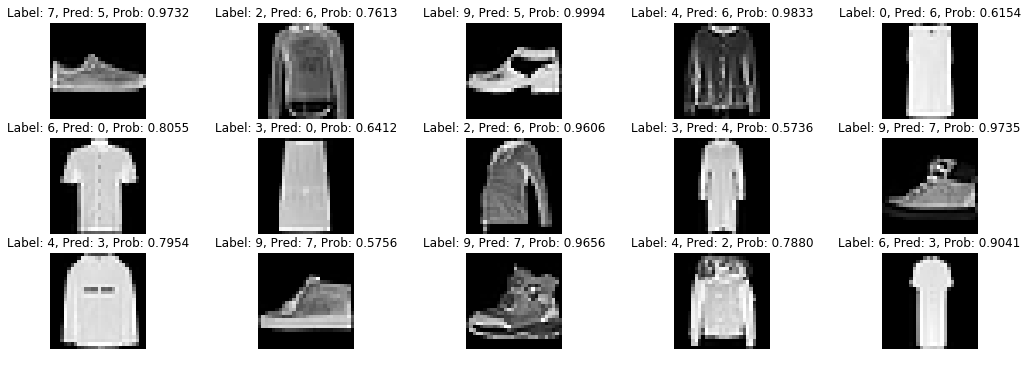

In [0]:
N = 15

plt.figure(figsize=(18, 6))
for i, ind in enumerate(incorrect[:N]):
  plt.subplot(3, 5, i+1)
  plt.imshow(x_test[ind].reshape(28, 28), cmap='gray')
  plt.title("Label: {}, Pred: {}, Prob: {:.4f}".format(y_test[ind], 
                                                       predictions[ind],
                                                       probabilities[ind]))
  plt.axis('off')

## Construct adversarial examples

Neural networks can be easily fooled by adverserial examples.

When we are training our network we use gradient descent to update its weights:

$\theta \leftarrow \theta - \alpha \cdot \frac{\partial L(\theta,\ x,\ y)}{\partial \theta}$, 

where $\theta$ is the weights of model, $\alpha$ is the learning rate, $x$ is the input, $y$ is the ground truth label, and $L(.,\ .,\ .)$ is the loss function. 

Here our goal is to decrease the loss by changing the *weights*. But we can also use gradient descent to maximize the probability that a given sample is misclasssified. We just have to fix the weights and chose a target label: 

$x \leftarrow x - \alpha \cdot \frac{\partial L(\theta,\ x,\ y)}{\partial x}$.

Here our goal is to decrease the loss by changing the *input*.

So let's choose a sample. For example trick the network to false classify a shirt (label 6) as a dress (label 3).  

In [0]:
source_label = 6

In [0]:
samples = np.where(y_test[correct] == source_label)[0]
idx = samples[np.random.randint(0, len(samples))]
orig_img = x_test[correct][idx]
orig_label = y_test[correct][idx]

In [0]:
orig_pred = model.predict(orig_img[None, :, :, :])[0]
orig_prob = np.max(orig_pred)
orig_pred = np.argmax(orig_pred)
print('Label: {}, Prediction: {}, Probability: {}'.format(orig_label, orig_pred, orig_prob))

Label: 6, Prediction: 6, Probability: 0.9037845134735107


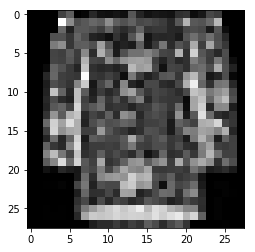

In [0]:
plt.imshow(orig_img.reshape(28,28), cmap='gray')

Set $\alpha$ to a some small number and derive the loss function respect to the input. 

In [0]:
target_label = 3
alpha = 0.1

adv_img = orig_img.copy().reshape(-1, 28, 28, 1)

In [0]:
import keras.backend as K

# Select the input and the output layer
input_layer = model.layers[0].input
output_layer = model.layers[-1].output
print(input_layer)
print(output_layer)

# and the cost function
cost_function = output_layer[0, target_label]
print(cost_function)

# Derive the loss function respect to the input
gradient_function = K.gradients(cost_function, input_layer)[0]
print(gradient_function)

# Define a function that calculates the cost and the gradients
calc_cost_gradients = K.function([input_layer, K.learning_phase()], 
                                 [cost_function, gradient_function])
print(calc_cost_gradients)

Tensor("conv2d_1_input:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("dense_2/Softmax:0", shape=(?, 10), dtype=float32)
Tensor("strided_slice_1:0", shape=(), dtype=float32)
Tensor("gradients_1/conv2d_1/convolution_grad/Conv2DBackpropInput:0", shape=(?, 28, 28, 1), dtype=float32)


Finally generate the adversarial example.

Note: If it's too slow, try changing the source and target labels. The more similar they are, the faster it will converge. 

In [0]:
import time, sys

start = time.time()
cost = 0.0

while cost < 0.90:
    # Calculate the cost to see how close the fake image is to the target class and
    # calculate the gradients to use in the next iteration for further adjustment.
    cost, gradients = calc_cost_gradients([adv_img, 0])

    # Use the calcuated gradients to push our image closer towards the desired class
    adv_img += alpha * gradients

    # Clip the image
    adv_img = np.clip(adv_img, -1.0, 1.0)
    
    # Display progress
    sys.stdout.write("\r>> {} - Adversarial prediction confidence: {:.8}%".format(time.time()-start, cost *100))
    sys.stdout.flush()

>> 0.11213445663452148 - Adversarial prediction confidence: 93.588817%

Let's see the results.

In [0]:
adv_pred = model.predict(adv_img)[0]
adv_prob = np.max(adv_pred)
adv_pred = np.argmax(adv_pred)
print('Label: {}, Prediction: {}, Probability: {}'.format(orig_label, adv_pred, 
                                                          adv_prob))

Label: 6, Prediction: 3, Probability: 0.9790624380111694


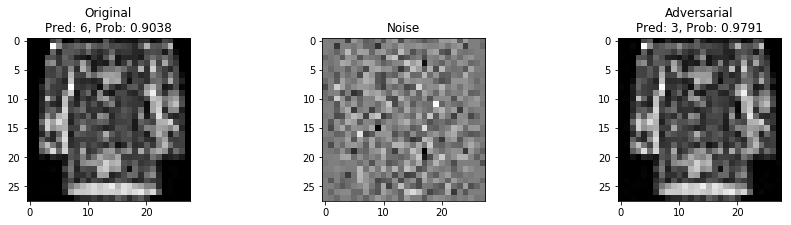

In [0]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.imshow(orig_img.reshape(28, 28), cmap='gray')
plt.title('Original\nPred: {}, Prob: {:.4f}'.format(orig_pred, orig_prob))

plt.subplot(1, 3, 2)
plt.imshow((orig_img - adv_img).reshape(28, 28), cmap='gray')
plt.title('Noise')

plt.subplot(1, 3, 3)
plt.imshow(adv_img.reshape(28, 28), cmap='gray')
plt.title('Adversarial\nPred: {}, Prob: {:.4f}'.format(adv_pred, adv_prob));

# References

* https://github.com/souravsingh/mnist-adversarial-attack
* https://colab.research.google.com/drive/1MSIkZy671MyEMyTK3HTBYAuOdzwrgt8Q#scrollTo=sAnvrKSkqLkc